In [ ]:
from google.colab import files

uploaded = files.upload()

Saving costeffortdataset.csv to costeffortdataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

#Load Dataset
df = pd.read_csv("costeffortdataset.csv", encoding='ascii')
print(df.head())

   id  Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0   1        1        1           4       85      12    5152           253   
1   2        2        0           0       86       4    5635           197   
2   3        3        4           4       85       1     805            40   
3   4        4        0           0       86       5    3829           200   
4   5        5        0           0       86       4    2149           140   

   Entities  PointsNonAdjust  Adjustment  PointsAjust  Language  
0        52              305          34          302         1  
1       124              321          33          315         1  
2        60              100          18           83         1  
3       119              319          30          303         1  
4        94              234          24          208         1  


In [ ]:
#Basic information about dataset
print("Dataset Shape:", df.shape)
print("\nData Types: ")
print(df.dtypes)

Dataset Shape: (81, 13)

Data Types: 
id                 int64
Project            int64
TeamExp            int64
ManagerExp         int64
YearEnd            int64
Length             int64
Effort             int64
Transactions       int64
Entities           int64
PointsNonAdjust    int64
Adjustment         int64
PointsAjust        int64
Language           int64
dtype: object


In [ ]:
#Display summary statistics
print("Summary Statistics: ")
print(df.describe().T)

Summary Statistics: 
                 count         mean          std    min     25%     50%  \
id                81.0    41.000000    23.526581    1.0    21.0    41.0   
Project           81.0    41.000000    23.526581    1.0    21.0    41.0   
TeamExp           81.0     2.185185     1.415195   -1.0     1.0     2.0   
ManagerExp        81.0     2.530864     1.643825   -1.0     1.0     3.0   
YearEnd           81.0    85.740741     1.222475   82.0    85.0    86.0   
Length            81.0    11.666667     7.424621    1.0     6.0    10.0   
Effort            81.0  5046.308642  4418.767228  546.0  2352.0  3647.0   
Transactions      81.0   182.123457   144.035098    9.0    88.0   140.0   
Entities          81.0   122.333333    84.882124    7.0    57.0    99.0   
PointsNonAdjust   81.0   304.456790   180.210159   73.0   176.0   266.0   
Adjustment        81.0    27.629630    10.591795    5.0    20.0    28.0   
PointsAjust       81.0   289.234568   185.761088   62.0   152.0   255.0   
Lang

In [ ]:
#Displaying distribution of target variable - EFFORT
print("Effort Distribution:")
print(stats.describe(df['Effort']))

Effort Distribution:
DescribeResult(nobs=81, minmax=(np.int64(546), np.int64(23940)), mean=np.float64(5046.308641975309), variance=np.float64(19525503.816049386), skewness=np.float64(1.9691857592206745), kurtosis=np.float64(4.356024788867449))


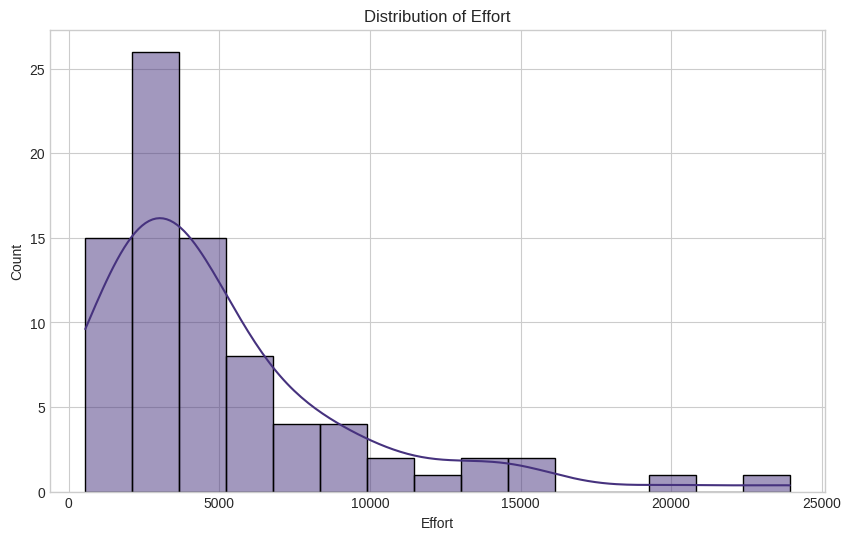

In [ ]:
#Exploratory Data Analysis

#Visualizing Distribution of Effort
plt.figure(figsize=(10, 6))
sns.histplot(df['Effort'], kde=True)
plt.title('Distribution of Effort')
plt.xlabel('Effort')
plt.ylabel('Count')
plt.show()

In [ ]:
# Identify numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

#Correlation Analysis of all features with Effort
correlation_with_effort = df[num_cols].corr()['Effort'].sort_values(ascending=False)
print("Correlation with Effort: ")
print(correlation_with_effort)

Correlation with Effort: 
Effort             1.000000
PointsAjust        0.738271
PointsNonAdjust    0.705449
Length             0.693280
Transactions       0.581881
Entities           0.510328
Adjustment         0.463865
ManagerExp         0.158303
id                 0.126153
Project            0.126153
TeamExp            0.119529
YearEnd           -0.048367
Language          -0.261942
Name: Effort, dtype: float64


In [ ]:
#Selected features with significant correlation (absolute value > 0.3)
significant_features = correlation_with_effort[abs(correlation_with_effort) > 0.3].index.tolist()
significant_features = [f for f in significant_features if f != 'Effort']

print("Significant features that influence Effort:")
print(significant_features)

Significant features that influence Effort:
['PointsAjust', 'PointsNonAdjust', 'Length', 'Transactions', 'Entities', 'Adjustment']


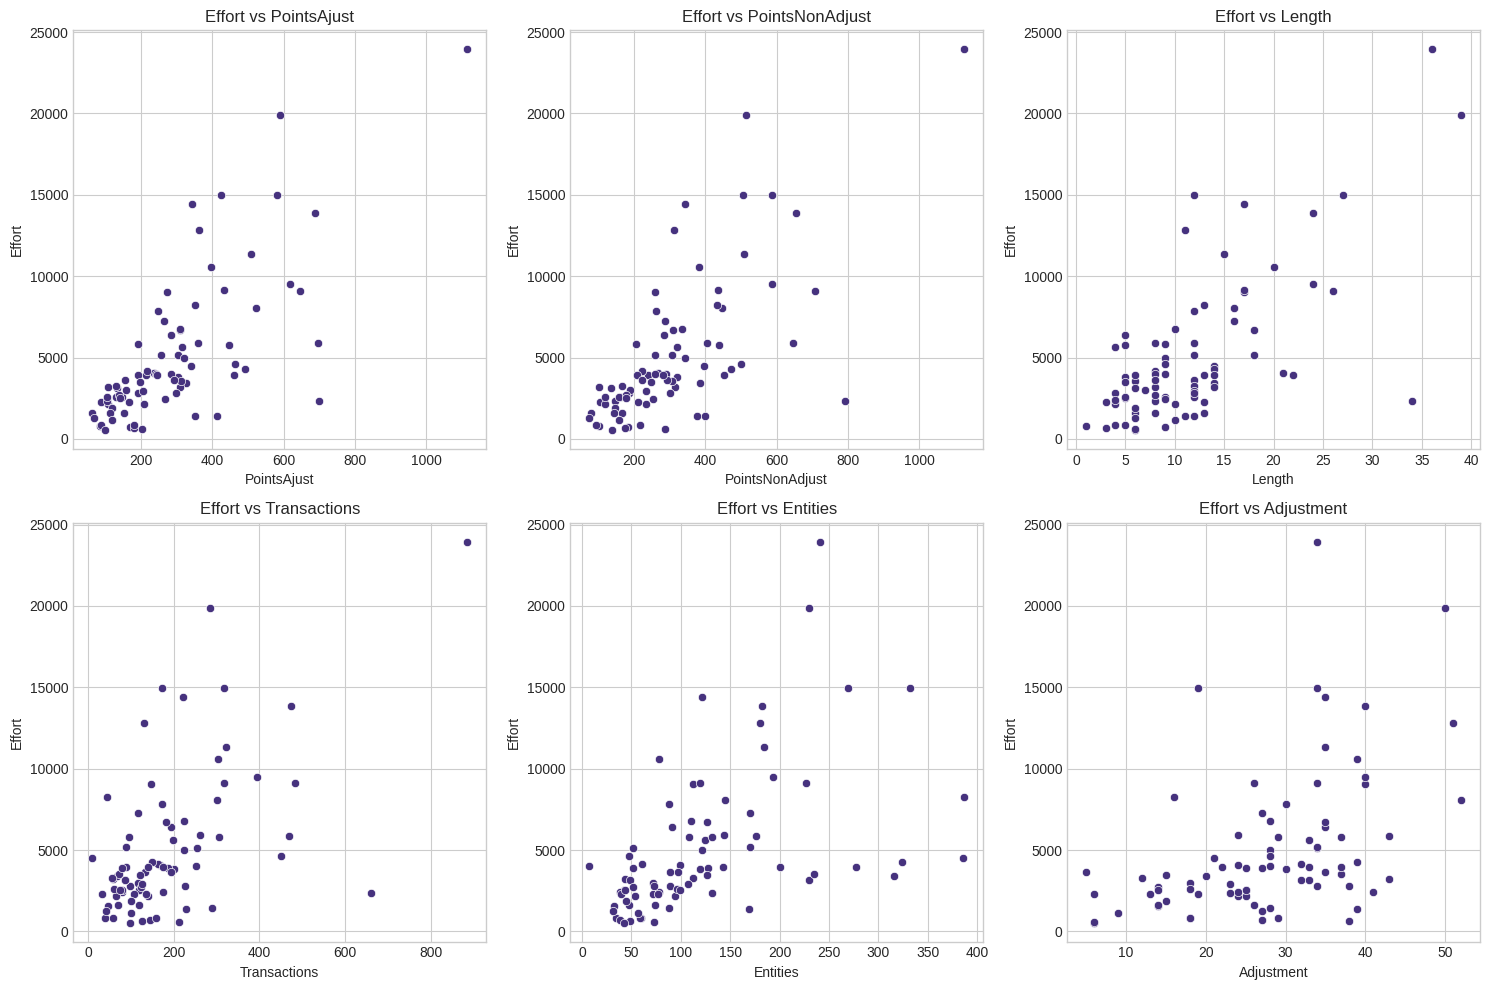

In [ ]:
#Visualization of Scatter plots of significant features vs Effort
plt.figure(figsize=(15, 10))
for idx, col in enumerate(significant_features):
  plt.subplot((len(significant_features) + 2) // 3, 3, idx+1)
  sns.scatterplot(x=df[col], y=df['Effort'])
  plt.title("Effort vs " + col)
  plt.xlabel(col)
  plt.ylabel("Effort")
  plt.tight_layout()
plt.show()

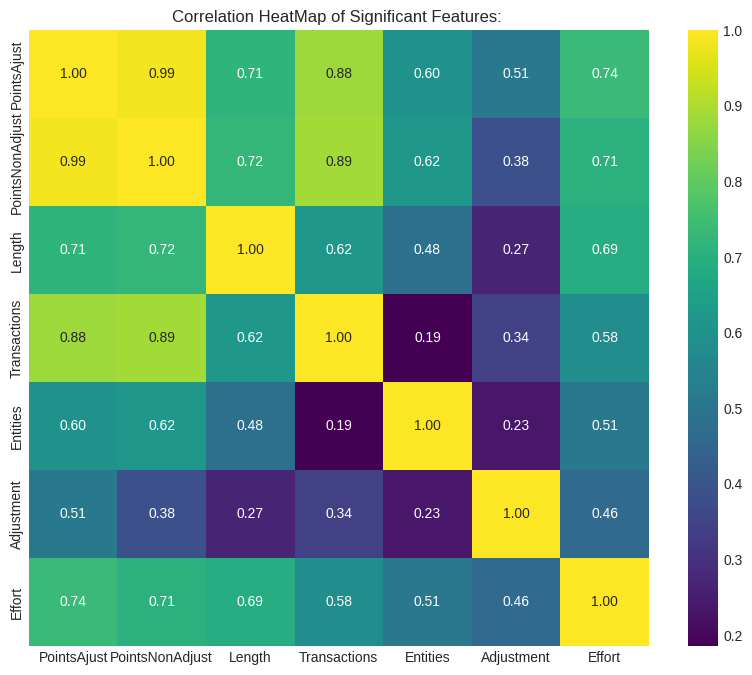

In [ ]:
#Correlation Heatmap of Significant features
plt.figure(figsize=(10,8))
correlation_matrix = df[significant_features + ['Effort']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation HeatMap of Significant Features: ")
plt.show()